# "Unveiling Insights: A Data-Driven Exploration of Restaurants"

** LEVEL-1 **

#Data Cleaning

In [2]:
#Importing important libraries and csv file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
#Getting the shape of Dataset
df.shape

(9551, 21)

In [4]:
#Getting the information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
#Checking for null-values in the Dataset
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [6]:
#Checking for duplicates in the Dataset
df.duplicated().sum()

0

In [7]:
#Dealing the null-values in Cuisines using mode
df['Cuisines'] = df['Cuisines'].fillna(df['Cuisines'].mode()[0])
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


* There were 9 empty values in Cuisines and i fill them with mode and now we are ready to dive into the analysis.

# Task 1: Top Cuisines
* Determine the top three most common cuisines in the dataset.
* Calculate the percentage of restaurants that serve each of the top cuisines.

Top 3 Most Common Cuisines:
Cuisines
North Indian    3969
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


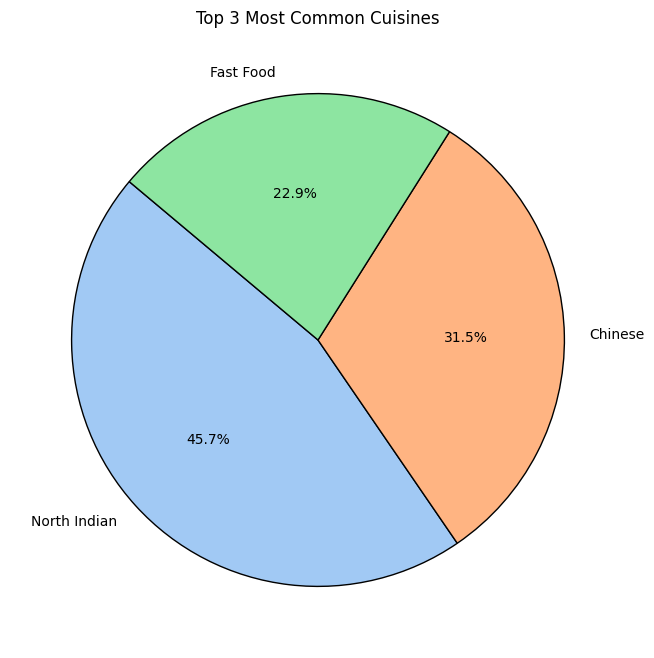

In [8]:
# Split the 'Cuisines' column into individual cuisines and count occurrences
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()

top_cuisines = cuisine_counts.head(3)
print("Top 3 Most Common Cuisines:")
print(top_cuisines)

#visualize the output using pie chart
colors = sns.color_palette("pastel")[:3]
plt.figure(figsize=(8, 8))
plt.pie(
    top_cuisines.values,
    labels=top_cuisines.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black"},
)
plt.title("Top 3 Most Common Cuisines")
plt.show()

In [9]:
# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage of restaurants serving each of the top cuisines
top_cuisines_percentages = round((top_cuisines / total_restaurants) * 100)

# Display the percentages
print("Percentage of Restaurants Serving Each of the Top Cuisines:")
print(top_cuisines_percentages)

Percentage of Restaurants Serving Each of the Top Cuisines:
Cuisines
North Indian    42.0
Chinese         29.0
Fast Food       21.0
Name: count, dtype: float64


# Task 2: City Analysis
* Identify the city with the highest numberof restaurants in the dataset.
* Calculate the average rating for restaurants in each city.
* Determine the city with the highest average rating.

In [10]:
#Count the number of restaurants in each city
city_counts = df['City'].value_counts()

#The city with the highest number of restaurants
city_with_most_restaurants = city_counts.idxmax()
highest_count = city_counts.max()

print(f"The city with the highest number of restaurants is '{city_with_most_restaurants}' with {highest_count} .")

The city with the highest number of restaurants is 'New Delhi' with 5473 .


In [11]:
#Calculate the average rating for restaurants in each city
average_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)

# Display the result
print("Average Rating for Restaurants in Each City:")
print(round(average_ratings))

Average Rating for Restaurants in Each City:
City
Inner City          5.0
Quezon City         5.0
Makati City         5.0
Pasig City          5.0
Mandaluyong City    5.0
                   ... 
New Delhi           2.0
Montville           2.0
Mc Millan           2.0
Noida               2.0
Faridabad           2.0
Name: Aggregate rating, Length: 141, dtype: float64


In [12]:
#City name highest avg rating
print("\nCity with the Highest Average Rating:")
print(average_ratings.idxmax())


City with the Highest Average Rating:
Inner City


# Task 3: Price Range Distribution

* Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
* Calculate the percentage of restaurants in each price range category.

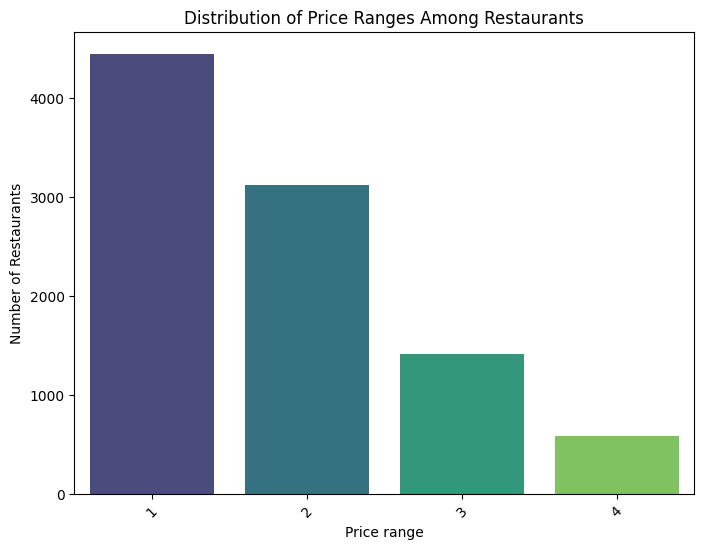

In [13]:
# Count the occurrences of each price range category
price_range_counts = df['Price range'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='viridis')
plt.xlabel('Price range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xticks(rotation=45)
plt.show()

Percentage of Restaurants in Each Price Range Category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


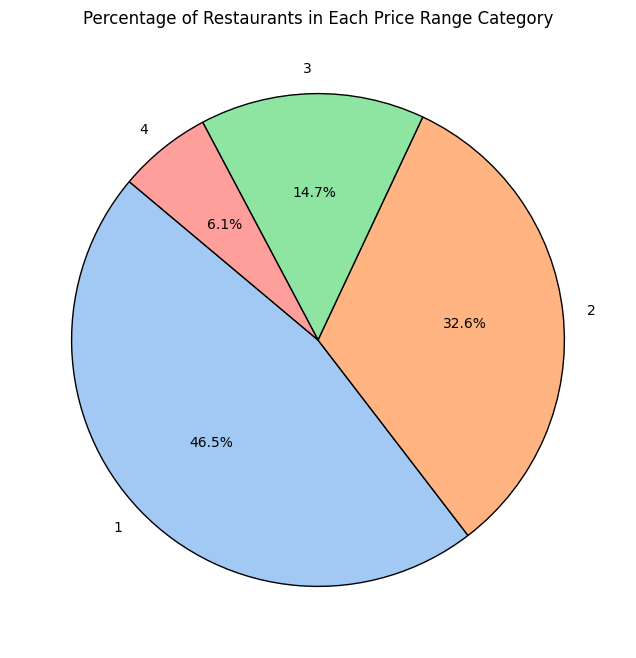

In [14]:
#Count the occurrences of each price range category
price_range_counts = df['Price range'].value_counts()

#Calculate the percentage for each category
price_range_percentages = (price_range_counts / len(df)) * 100

#Display the percentages
print("Percentage of Restaurants in Each Price Range Category:")
print(price_range_percentages)

#Create a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")[:len(price_range_percentages)]  # Generate a pastel color palette
plt.pie(
    price_range_percentages,
    labels=price_range_percentages.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={"edgecolor": "black"},
)

#Adding a title and display
plt.title("Percentage of Restaurants in Each Price Range Category")
plt.show()

# Task 4: Online Delivery
* Determine the percentage of restaurants
that offer online delivery.
* Compare the average ratings of restaurants
with and without online delivery.

In [15]:
#Restaurants offering online delivery
delivery_count = df[df['Has Online delivery'] == 'Yes'].shape[1]

#Percentage of restaurants offering online delivery
delivery_percentage = (delivery_count / len(df)) * 100

#Display the output
print(f"Percentage of Restaurants Offering Online Delivery: {delivery_percentage:.2f}%")

Percentage of Restaurants Offering Online Delivery: 0.22%


Average Ratings of Restaurants with and without Online Delivery:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


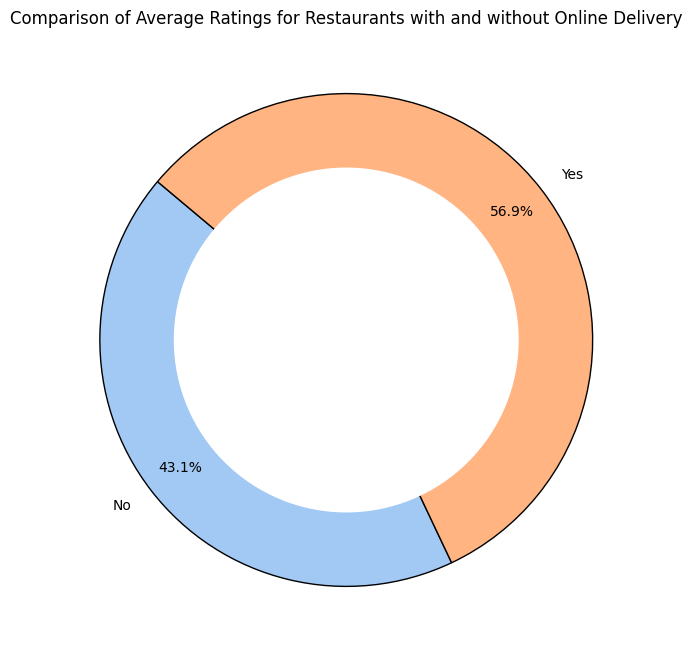

In [16]:
#Group by 'Online Delivery' and calculate the average rating
average_ratings_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()

#Display the output
print("Average Ratings of Restaurants with and without Online Delivery:")
print(average_ratings_delivery)

#Set the colors for the chart
colors = sns.color_palette("pastel")[:2]

#The pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    average_ratings_delivery,
    labels=average_ratings_delivery.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'},
    pctdistance=0.85
)

#Create the donut shape
center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

#Add a title and display the chart
plt.title('Comparison of Average Ratings for Restaurants with and without Online Delivery')
plt.show()

* I have accomplished all the tasks and tried to visualize them using different plots and charts for better understanding.